# Lab 1 Packet Sniffing and Spoofing
## Task 1.1: Sniffing Packets
### Task 1.1A
The above program sniffs packets. For each captured packet, the callback function print pkt() will be invoked; this function will print out some of the information about the packet. Run the program with the root privilege and demonstrate that you can indeed capture packets. After that, run the program again, but without using the root privilege; describe and explain your observations.

In [4]:
!cat 'Task 1.1A'/sniffer.py

#!/usr/bin/env python3

from scapy.all import *

def print_pkt(pkt):
    pkt.show()

pkt = sniff(iface='br-3e5f42528ad9', filter='icmp', prn=print_pkt)


### Running program without root privilege

In [5]:
# ./sniffer.py > sniffer.txt
!cat 'Task 1.1A'/sniffer.txt

bash: sniffer.txt: Permission denied

sniff() needs to set promiscuous mode so root privilege is required


### Running program with root privilege

In [6]:
# sudo ./sniffer.py > sudo_sniffer.txt
!cat 'Task 1.1A'/sudo_sniffer.txt

###[ Ethernet ]### 
  dst       = 02:42:0a:09:00:06
  src       = 02:42:0a:09:00:05
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 84
     id        = 54161
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = icmp
     chksum    = 0x52fb
     src       = 10.9.0.5
     dst       = 10.9.0.6
     \options   \
###[ ICMP ]### 
        type      = echo-request
        code      = 0
        chksum    = 0xbd7b
        id        = 0x3a
        seq       = 0x1
###[ Raw ]### 
           load      = '\xfb\xd5\xfda\x00\x00\x00\x00{>\x07\x00\x00\x00\x00\x00\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e\x1f !"#$%&\'()*+,-./01234567'

###[ Ethernet ]### 
  dst       = 02:42:0a:09:00:05
  src       = 02:42:0a:09:00:06
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 84
     id        = 39399
     flags     = 
     frag      = 0
     ttl       = 

## Task 1.1B
Usually, when we sniff packets, we are only interested certain types of packets. We can do that by setting filters in sniffing. Scapy’s filter use the BPF (Berkeley Packet Filter) syntax; you can find the BPF manual from the Internet. Please set the following filters and demonstrate your sniffer program again (each filter should be set separately):

* Capture only the ICMP packet

In [10]:
!cat 'Task 1.1B'/sniffer_icmp.py

#!/usr/bin/env python3

from scapy.all import *

def print_pkt(pkt):
    pkt.show()

pkt = sniff(iface='ens4', filter='icmp', prn=print_pkt)


In [7]:
# ./sniffer_icmp.py > sniffer_icmp.txt
!cat 'Task 1.1B'/sniffer_icmp.txt

[02/10/22]admin@ubuntu-1:~/.../Task 2.3$ ping 8.8.8.8 -c 1
PING 8.8.8.8 (8.8.8.8) 56(84) bytes of data.
64 bytes from 8.8.8.8: icmp_seq=1 ttl=115 time=1.06 ms

--- 8.8.8.8 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 1.056/1.056/1.056/0.000 ms


root@ubuntu-1:/volumes/Task 1.1B# ./sniffer_icmp.py
###[ Ethernet ]### 
  dst       = 42:01:0a:94:00:01
  src       = 42:01:0a:94:00:1a
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 84
     id        = 62046
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = icmp
     chksum    = 0x2d8d
     src       = 10.148.0.26
     dst       = 8.8.8.8
     \options   \
###[ ICMP ]### 
        type      = echo-request
        code      = 0
        chksum    = 0xb88d
        id        = 0xa
        seq       = 0x1
###[ Raw ]### 
           load      = '\xa8j\x04b\x00\x00\x00\x00\xcb\xc7\x08\x00\x00\x00\x00\x00\x10\

* Capture any TCP packet that comes from a particular IP and with a destination port number 23

In [11]:
!cat 'Task 1.1B'/sniffer_tcp.py

#!/usr/bin/env python3

from scapy.all import *

def print_pkt(pkt):
    pkt.show()

pkt = sniff(iface='br-3e5f42528ad9', filter='tcp && src host 10.9.0.5 && dst port 23', prn=print_pkt)


In [8]:
# ./sniffer_tcp.py > sniffer_tcp.txt
!cat 'Task 1.1B'/sniffer_tcp.txt

###[ Ethernet ]### 
  dst       = 02:42:0a:09:00:06
  src       = 02:42:0a:09:00:05
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x10
     len       = 60
     id        = 943
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = tcp
     chksum    = 0x22e1
     src       = 10.9.0.5
     dst       = 10.9.0.6
     \options   \
###[ TCP ]### 
        sport     = 51168
        dport     = telnet
        seq       = 2817136395
        ack       = 0
        dataofs   = 10
        reserved  = 0
        flags     = S
        window    = 64240
        chksum    = 0x144b
        urgptr    = 0
        options   = [('MSS', 1460), ('SAckOK', b''), ('Timestamp', (424749911, 0)), ('NOP', None), ('WScale', 7)]

###[ Ethernet ]### 
  dst       = 02:42:0a:09:00:06
  src       = 02:42:0a:09:00:05
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x10
     len       = 52
     id        = 944
     flags  

* Capture packets comes from or to go to a particular subnet. You can pick any subnet, such as 128.230.0.0/16; you should not pick the subnet that your VM is attached to.

In [12]:
!cat 'Task 1.1B'/sniffer_subnet.py

#!/usr/bin/env python3

from scapy.all import *

def print_pkt(pkt):
    pkt.show()

pkt = sniff(filter='net 128.230.0.0/16', prn=print_pkt)


In [9]:
# ./sniffer_subnet.py > sniffer_subnet.txt
!cat 'Task 1.1B'/sniffer_subnet.txt

###[ Ethernet ]### 
  dst       = 42:01:0a:94:00:01
  src       = 42:01:0a:94:00:1a
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 60
     id        = 61739
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = tcp
     chksum    = 0xbdf7
     src       = 10.148.0.26
     dst       = 128.230.0.5
     \options   \
###[ TCP ]### 
        sport     = 48938
        dport     = telnet
        seq       = 1669110445
        ack       = 0
        dataofs   = 10
        reserved  = 0
        flags     = S
        window    = 65320
        chksum    = 0x8bc7
        urgptr    = 0
        options   = [('MSS', 1420), ('SAckOK', b''), ('Timestamp', (3525146958, 0)), ('NOP', None), ('WScale', 7)]

###[ Ethernet ]### 
  dst       = 42:01:0a:94:00:01
  src       = 42:01:0a:94:00:1a
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 84
     id        = 33739
   

## Task 1.2: Spoofing ICMP Packets
As a packet spoofing tool, Scapy allows us to set the fields of IP packets to arbitrary values. The objective of this task is to spoof IP packets with an arbitrary source IP address. We will spoof ICMP echo request packets, and send them to another VM on the same network. We will use Wireshark to observe whether our request will be accepted by the receiver. If it is accepted, an echo reply packet will be sent to the spoofed IP address.

In [13]:
!cat 'Task 1.2'/spoof_icmp.py

#!/usr/bin/env python3

from scapy.all import *
a = IP()
a.dst = '1.2.3.4'
b = ICMP()
p = a/b

ls(a)

send(p, iface='br-3e5f42528ad9')


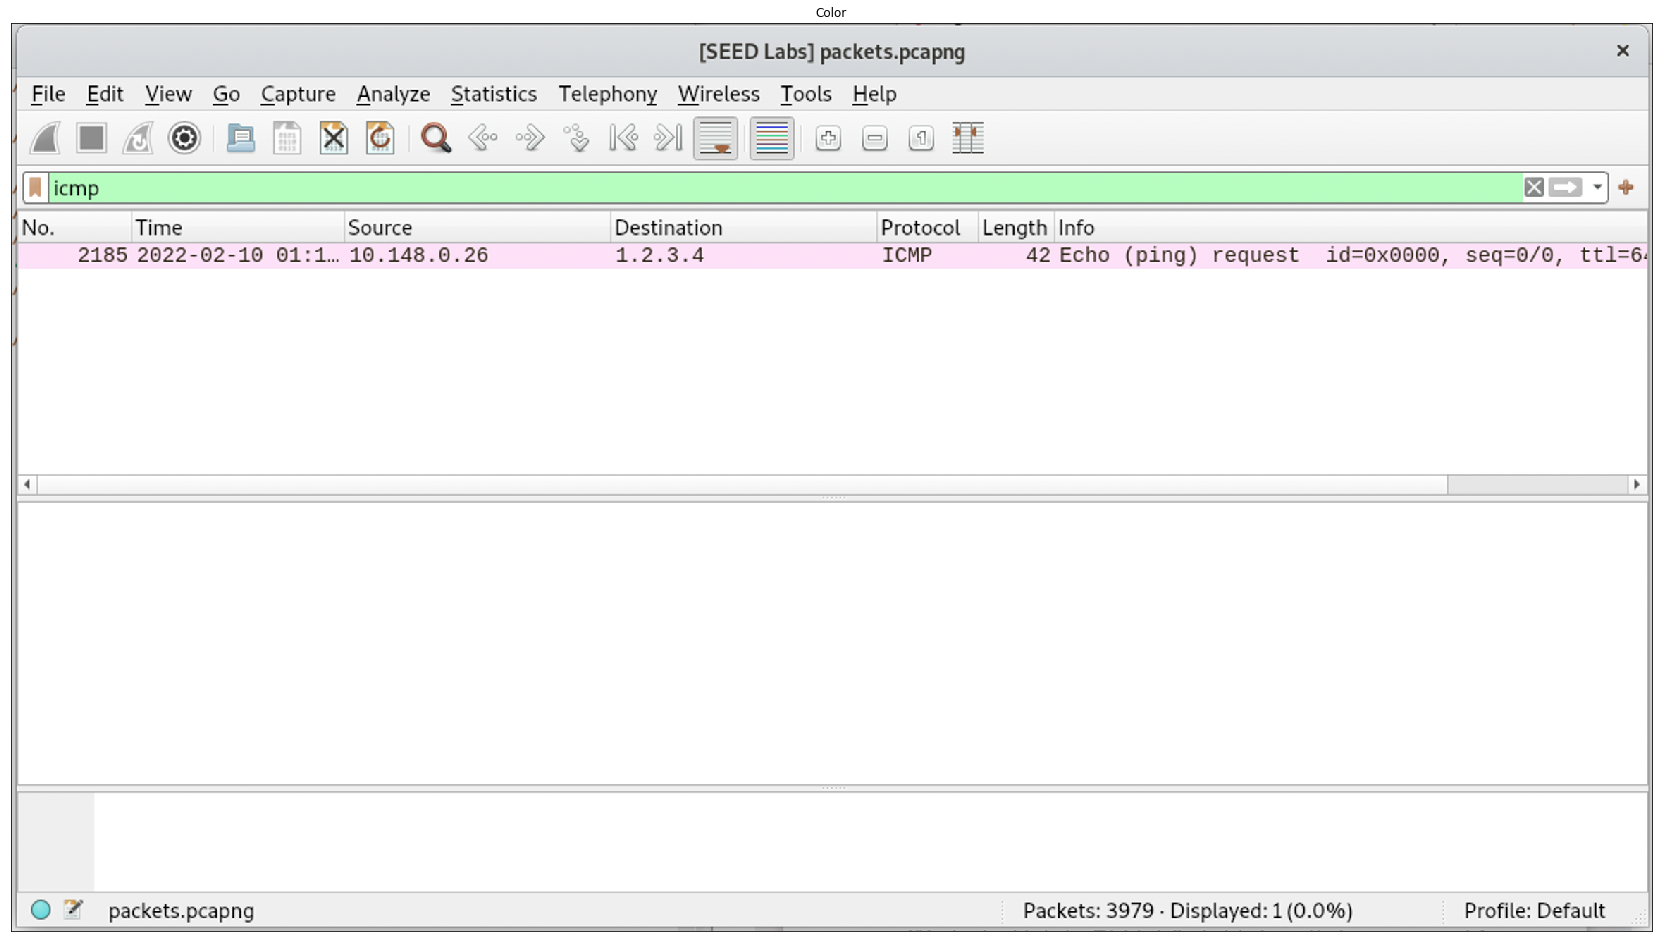

In [9]:
import cv2
from matplotlib import pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (100.0, 80.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def show_img(img):
    img = cv2.imread(img,-1)
    plt.subplot(131),plt.imshow(img),
    plt.title('Color'),plt.xticks([]), plt.yticks([])
    plt.show()

show_img('Task 1.2/packets.png')

## Task 1.3: Spoofing ICMP Packets
The objective of this task is to use Scapy to estimate the distance, in terms of number of routers, between your VM and a selected destination. This is basically what is implemented by the traceroute tool. In this task, we will write our own tool. The idea is quite straightforward: just send an packet (any type) to the destination, with its Time-To-Live (TTL) field set to 1 first. This packet will be dropped by the first router, which will send us an ICMP error message, telling us that the time-to-live has exceeded. That is how we get the IP address of the first router. We then increase our TTL field to 2, send out another packet, and get the IP address of the second router. We will repeat this procedure until our packet finally reach the destination. It should be noted that this experiment only gets an estimated result, because in theory, not all these packets take the same route (but in practice, they may within a short period of time).

In [5]:
!cat 'Task 1.3'/traceroute.py

#!/usr/bin/python3

from scapy.all import *
from time import time
import sys
import logging

logging.getLogger("scapy.runtime").setLevel(logging.ERROR)


args = sys = sys.argv

if len(args) != 2:
    print('Usage:\npython3 traceroute.py <host>')
    exit()

MAX_TTL = 30
host = args[1]
ip = socket.gethostbyname(host)
print(f'traceroute to {host} ({ip}), {MAX_TTL} hops max')

a = IP()
a.dst = ip
a.ttl = 1
b = ICMP()

init_time = int(time() * 1000)
while a.ttl <= MAX_TTL:
    reply = sr1(a/b, verbose=0, timeout=2)
    if reply is not None:
        rep = reply.src
        diff = (int(time() * 1000) - init_time) / a.ttl
        print(f'{str(a.ttl)} {rep} {diff} ms')
        if rep == ip:
            break
    else:
        print(f'{str(a.ttl)} * * *')
    a.ttl += 1




In [6]:
# ./traceroute.py 8.8.8.8 > trace.txt
!cat 'Task 1.3'/trace.txt

traceroute to 8.8.8.8 (8.8.8.8), 30 hops max
1 * * *
2 * * *
3 * * *
4 * * *
5 * * *
6 * * *
7 * * *
8 * * *
9 * * *
10 * * *
11 8.8.8.8 1855.6363636363637 ms


## Task 1.4: Sniffing and-then Spoofing

In this task, you will combine the sniffing and spoofing techniques to implement the following sniff-and- then-spoof program. You need two VMs on the same LAN. From VM A, you ping an IP X. This will generate an ICMP echo request packet. If X is alive, the ping program will receive an echo reply, and print out the response. Your sniff-and-then-spoof program runs on VM B, which monitors the LAN through packet sniffing. Whenever it sees an ICMP echo request, regardless of what the target IP address is, your program should immediately send out an echo reply using the packet spoofing technique. Therefore, regard- less of whether machine X is alive or not, the ping program will always receive a reply, indicating that X is alive. You need to use Scapy to do this task. In your report, you need to provide evidence to demonstrate that your technique works.

In [8]:
!cat 'Task 1.4'/sniff_and_spoof.py

#!/usr/bin/python3

from scapy.all import *

def spoof(pkt):
    if ICMP in pkt and pkt[ICMP].type != 8:
        return
    ip = IP(src=pkt[IP].dst, dst=pkt[IP].src, ihl=pkt[IP].ihl)
    icmp = ICMP(type=0, id=pkt[ICMP].id, seq=pkt[ICMP].seq)
    data = pkt[Raw].load
    new_pkt = ip/icmp/data

    send(new_pkt)
    print('Sending spoofed pkt from: ' + pkt[IP].src + " back to " + pkt[IP].dst)

pkt = sniff(filter='icmp', prn=spoof)


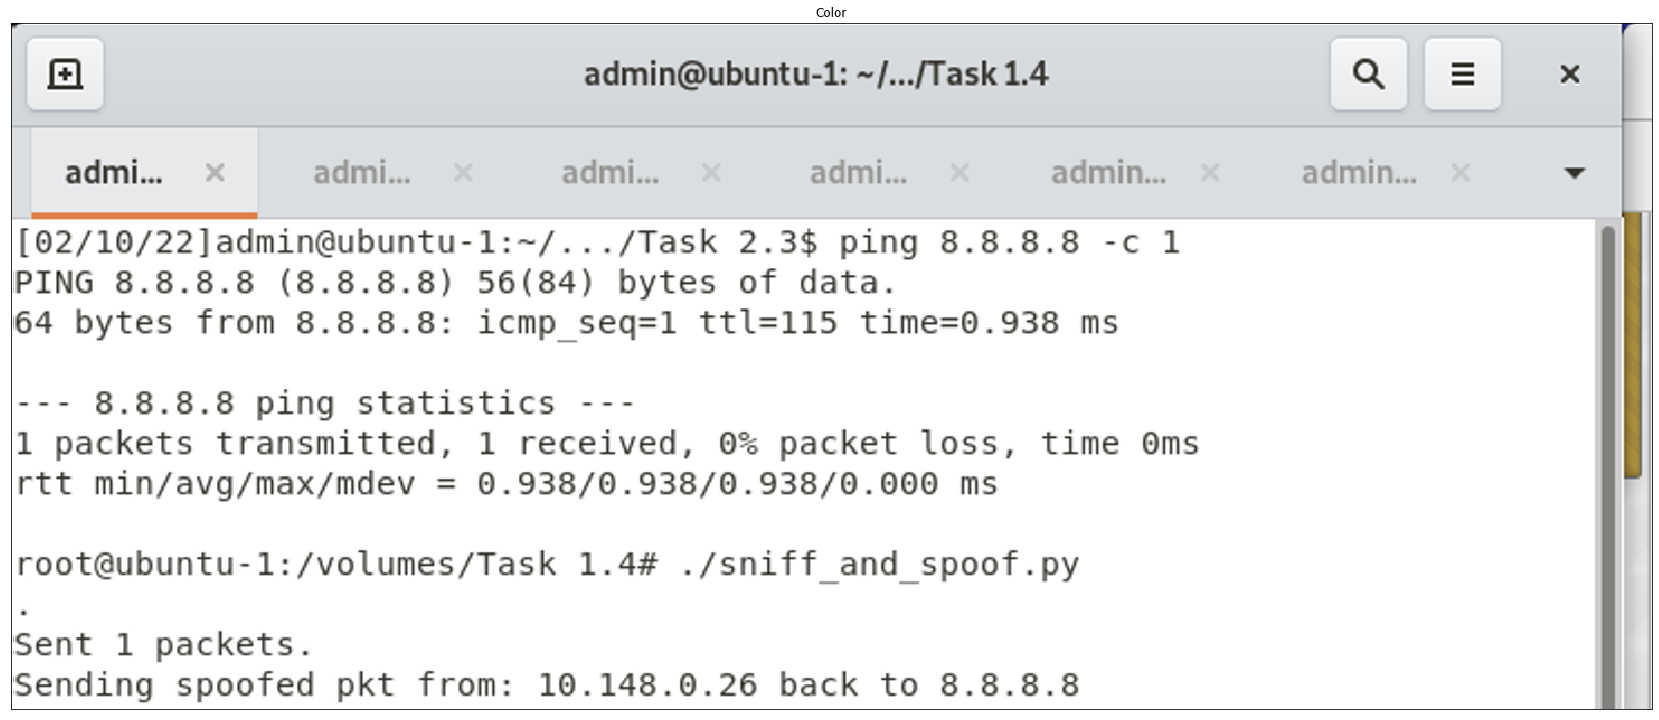

In [10]:
show_img('Task 1.4/sniff_and_spoof.png')

## Lab Task Set 2: Writing Programs to Sniff and Spoof Packets
### Task 2.1: Writing Packet Sniffing Program
#### Task 2.1A:
Understanding How a Sniffer Works In this task, students need to write a sniffer program to print out the source and destination IP addresses of each captured packet. Students can type in the above code or download the sample code from the SEED book’s website (https://www.handsonsecurity.net/figurecode.html). Students should provide screenshots as evidences to show that their sniffer program can run successfully and produces expected results.

In [11]:
# gcc -o sniff sniff.c -lpcap
!cat 'Task 2.1A'/sniff.c

#include <pcap.h>
#include <stdlib.h>
#include <stdio.h>

void got_packet(u_char *args, const struct pcap_pkthdr *header,
        const u_char *packet)
{
   printf("Got a packet\n");
}

int main()
{
  pcap_t *handle;
  char errbuf[PCAP_ERRBUF_SIZE];
  struct bpf_program fp;
  char filter_exp[] = "ip proto icmp";
  bpf_u_int32 net;

  // Step 1: Open live pcap session on NIC with name enp0s3
  handle = pcap_open_live("ens4", BUFSIZ, 1, 1000, errbuf); 
  if (handle == NULL) {
    fprintf(stderr, "Can't open ens4: %s\n", errbuf);
    exit(1);
  }

  // Step 2: Compile filter_exp into BPF psuedo-code
  pcap_compile(handle, &fp, filter_exp, 0, net);              
  pcap_setfilter(handle, &fp);                                

  // Step 3: Capture packets
  pcap_loop(handle, -1, got_packet, NULL);                    

  pcap_close(handle);   //Close the handle
  return 0;
}



* Question 1. Please use your own words to describe the sequence of the library calls that are essential for sniffer programs. This is meant to be a summary, not detailed explanation like the one in the tutorial or book.

In [16]:
!cat 'Task 2.1A'/q1

1. pcap_open_live method is used to open live pcap session in promiscuous mode to capture packet from NIC with name ens4
2. pcap_compile is used to parse and store the compiled version of the filter
3. after compiling the expression, the pcap_setfilter function is used to install the filter
4. the got_packet method is used to retrieve the source and destination IP from the IP header


In [13]:
# gcc -o sniff_improved sniff_improved.c -lpcap
!cat 'Task 2.1A'/sniff_improved.c

#include <pcap.h>
#include <stdio.h>
#include <stdlib.h>
#include <arpa/inet.h>

/* Ethernet header */
struct ethheader {
  u_char  ether_dhost[6]; /* destination host address */
  u_char  ether_shost[6]; /* source host address */
  u_short ether_type;     /* protocol type (IP, ARP, RARP, etc) */
};

/* IP Header */
struct ipheader {
  unsigned char      iph_ihl:4, //IP header length
                     iph_ver:4; //IP version
  unsigned char      iph_tos; //Type of service
  unsigned short int iph_len; //IP Packet length (data + header)
  unsigned short int iph_ident; //Identification
  unsigned short int iph_flag:3, //Fragmentation flags
                     iph_offset:13; //Flags offset
  unsigned char      iph_ttl; //Time to Live
  unsigned char      iph_protocol; //Protocol type
  unsigned short int iph_chksum; //IP datagram checksum
  struct  in_addr    iph_sourceip; //Source IP address
  struct  in_addr    iph_destip;   //Destination IP address
};

void got_packet(u_char *args,

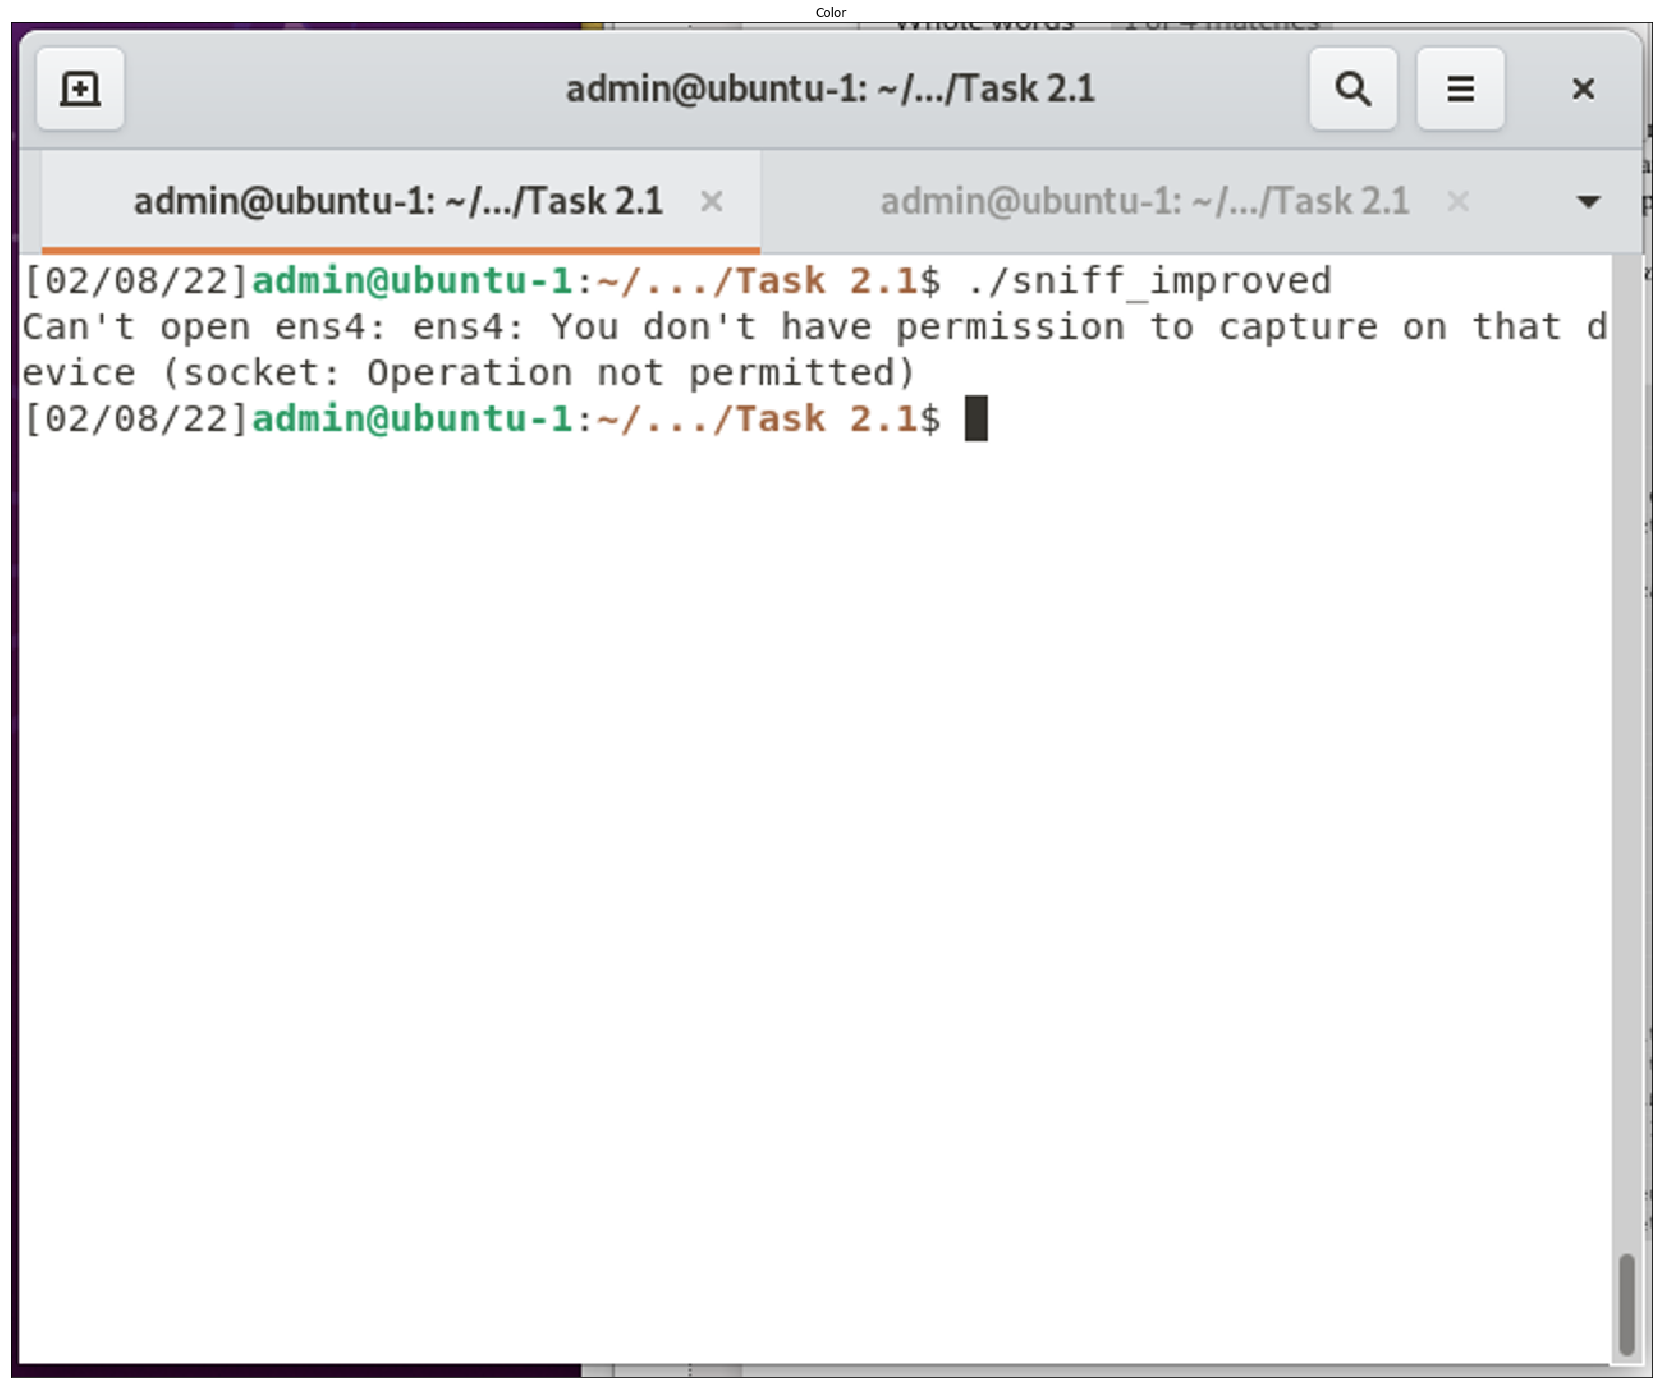

In [24]:
# ./sniff_improved
show_img('Task 2.1A/sniff_improved.png')

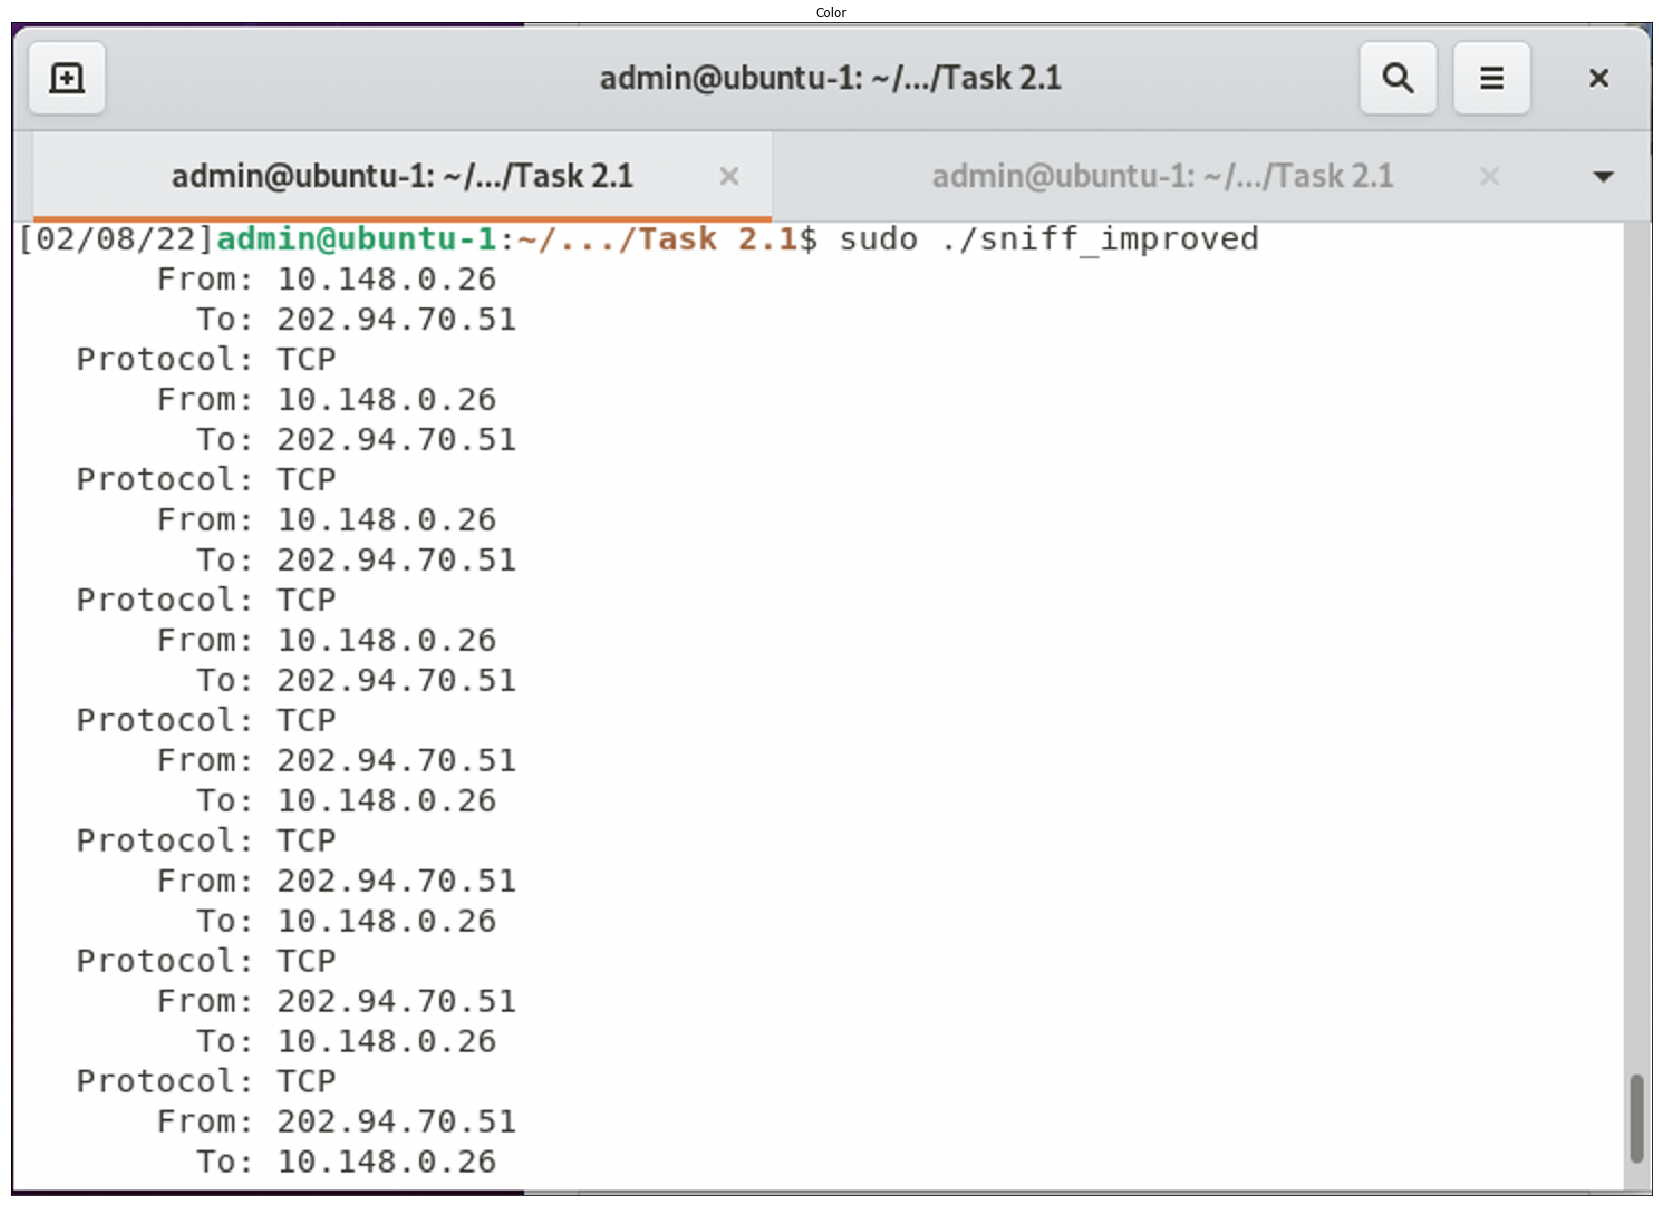

In [23]:
# sudo ./sniff_improved
show_img('Task 2.1A/sudo_sniff_improved.png')

* Question 2. Why do you need the root privilege to run a sniffer program? Where does the program fail if it is executed without the root privilege?

In [17]:
!cat 'Task 2.1A'/q2

The sniff program needs to be run in promiscuous mode and to access the raw socket, which are privileged functions. The pcap_open_live method fails as it is unable to be run in the promiscuous mode


In [14]:
# gcc -o sniff_raw sniff_raw.c -lpcap
# ./sniff_raw
!cat 'Task 2.1A'/sniff_raw.c

#include <unistd.h>
#include <stdio.h>
#include <sys/socket.h>
#include <linux/if_packet.h>
#include <net/ethernet.h>
#include <arpa/inet.h>
#include <stdlib.h>

int main() {
    int PACKET_LEN = 512;
    char buffer[PACKET_LEN];
    struct sockaddr saddr;
    struct packet_mreq mr;
    int def = -1;

    // Create the raw socket
    int sock = socket(AF_PACKET, SOCK_RAW, htons(ETH_P_ALL)); 
    
    // Turn off the promiscuous mode.
    // mr.mr_type = PACKET_MR_PROMISC;
    setsockopt(sock, SOL_PACKET, PACKET_ADD_MEMBERSHIP, &mr, sizeof(mr));

    // Getting captured packets
    int data_size=recvfrom(sock, buffer, PACKET_LEN, 0, 
                     &saddr, (socklen_t*)sizeof(saddr));
    if(data_size) printf("Got one packet\n");

    // Turn on the promiscuous mode.
    mr.mr_type = PACKET_MR_PROMISC;
    setsockopt(sock, SOL_PACKET, PACKET_ADD_MEMBERSHIP, &mr, sizeof(mr));

    // Getting captured packets
    data_size=recvfrom(sock, buffer, PACKET_LEN, 0,
                     &s

* Question 3. Please turn on and turn off the promiscuous mode in your sniffer program. Can you demonstrate the difference when this mode is on and off? Please describe how you can demonstrate this.

In [18]:
!cat 'Task 2.1A'/q3

No difference, I attempted it, but wasnt able to see a difference


### Task 2.1B:
Writing Filters. Please write filter expressions for your sniffer program to capture each of the followings. You can find online manuals for pcap filters. In your lab reports, you need to include screenshots to show the results after applying each of these filters.
* Capture the ICMP packets between two specific hosts.


In [20]:
# gcc -o sniff sniff.c -lpcap
!cat 'Task 2.1B'/sniff.c

/*
 * sniffex.c
 *
 * Sniffer example of TCP/IP packet capture using libpcap.
 *
 * Version 0.1.1 (2005-07-05)
 * Copyright (c) 2005 The Tcpdump Group
 *
 * This software is intended to be used as a practical example and
 * demonstration of the libpcap library; available at:
 * http://www.tcpdump.org/
 *
 ****************************************************************************
 *
 * This software is a modification of Tim Carstens' "sniffer.c"
 * demonstration source code, released as follows:
 *
 * sniffer.c
 * Copyright (c) 2002 Tim Carstens
 * 2002-01-07
 * Demonstration of using libpcap
 * timcarst -at- yahoo -dot- com
 *
 * "sniffer.c" is distributed under these terms:
 *
 * Redistribution and use in source and binary forms, with or without
 * modification, are permitted provided that the following conditions
 * are met:
 * 1. Redistributions of source code must retain the above copyright
 *    notice, this list of conditions and the following disclaimer.
 * 2. Redistributions 

In [26]:
# sudo ./sniff ens4 icmp
!cat 'Task 2.1B'/ICMP/icmp.txt

[02/09/22]admin@ubuntu-1:~/.../Task 2.1B$ sudo ./sniff ens4 icmp
sniffex - Sniffer example using libpcap
Copyright (c) 2005 The Tcpdump Group
THERE IS ABSOLUTELY NO WARRANTY FOR THIS PROGRAM.

Device: ens4
Number of packets: 10
Filter expression: icmp

Packet number 1:
       From: 10.148.0.26
         To: 8.8.8.8
   Protocol: ICMP

Packet number 2:
       From: 8.8.8.8
         To: 10.148.0.26
   Protocol: ICMP



* Capture the TCP packets with a destination port number in the range from 10 to 100.

In [28]:
# ./sniff br-3e5f42528ad9 "tcp dst portrange 10-100"
!cat 'Task 2.1B'/TCP/tcp.txt

root@ubuntu-1:/volumes/Task 2.1B# ./sniff br-3e5f42528ad9 "tcp dst portrange 10-100"
sniffex - Sniffer example using libpcap
Copyright (c) 2005 The Tcpdump Group
THERE IS ABSOLUTELY NO WARRANTY FOR THIS PROGRAM.

Device: br-3e5f42528ad9
Number of packets: 10
Filter expression: tcp dst portrange 10-100

Packet number 1:
       From: 10.9.0.5
         To: 10.9.0.6
   Protocol: TCP
   Src port: 40668
   Dst port: 10

Packet number 2:
       From: 10.9.0.5
         To: 10.9.0.6
   Protocol: TCP
   Src port: 50048
   Dst port: 23

Packet number 3:
       From: 10.9.0.5
         To: 10.9.0.6
   Protocol: TCP
   Src port: 50048
   Dst port: 23

Packet number 4:
       From: 10.9.0.5
         To: 10.9.0.6
   Protocol: TCP
   Src port: 50048
   Dst port: 23
   Payload (24 bytes):
00000   ff fd 03 ff fb 18 ff fb  1f ff fb 20 ff fb 21 ff    ........... ..!.
00016   fb 22 ff fb 27 ff fd 05                             ."..'...

Packet number 5:
       From: 10.9.0.5
         To: 10.9.0.6
   Protoco

### Task 2.1C:
Sniffing Passwords. Please show how you can use your sniffer program to capture the pass- word when somebody is using telnet on the network that you are monitoring. You may need to modify your sniffer code to print out the data part of a captured TCP packet (telnet uses TCP). It is acceptable if you print out the entire data part, and then manually mark where the password (or part of it) is.

In [37]:
# ./sniff br-3e5f42528ad9 "dst port 23"
!cat 'Task 2.1C'/telnet.txt

seed@f12041b6e2ad:~$ telnet 10.9.0.6
Trying 10.9.0.6...
Connected to 10.9.0.6.
Escape character is '^]'.
Ubuntu 20.04.1 LTS
f12041b6e2ad login: seed
Password: 
Welcome to Ubuntu 20.04.1 LTS (GNU/Linux 5.11.0-1029-gcp x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

This system has been minimized by removing packages and content that are
not required on a system that users do not log into.

To restore this content, you can run the 'unminimize' command.
Last login: Wed Feb  9 02:23:48 UTC 2022 from hostA-10.9.0.5.net-10.9.0.0 on pts/2


root@ubuntu-1:/volumes/Task 2.1B# ./sniff br-3e5f42528ad9 "dst port 23"
sniffex - Sniffer example using libpcap
Copyright (c) 2005 The Tcpdump Group
THERE IS ABSOLUTELY NO WARRANTY FOR THIS PROGRAM.

Device: br-3e5f42528ad9
Number of packets: 2147483647
Filter expression: dst port 23

Packet number 1:
       From: 10.9.0.5
         To: 10.9.0.6
   Protoc

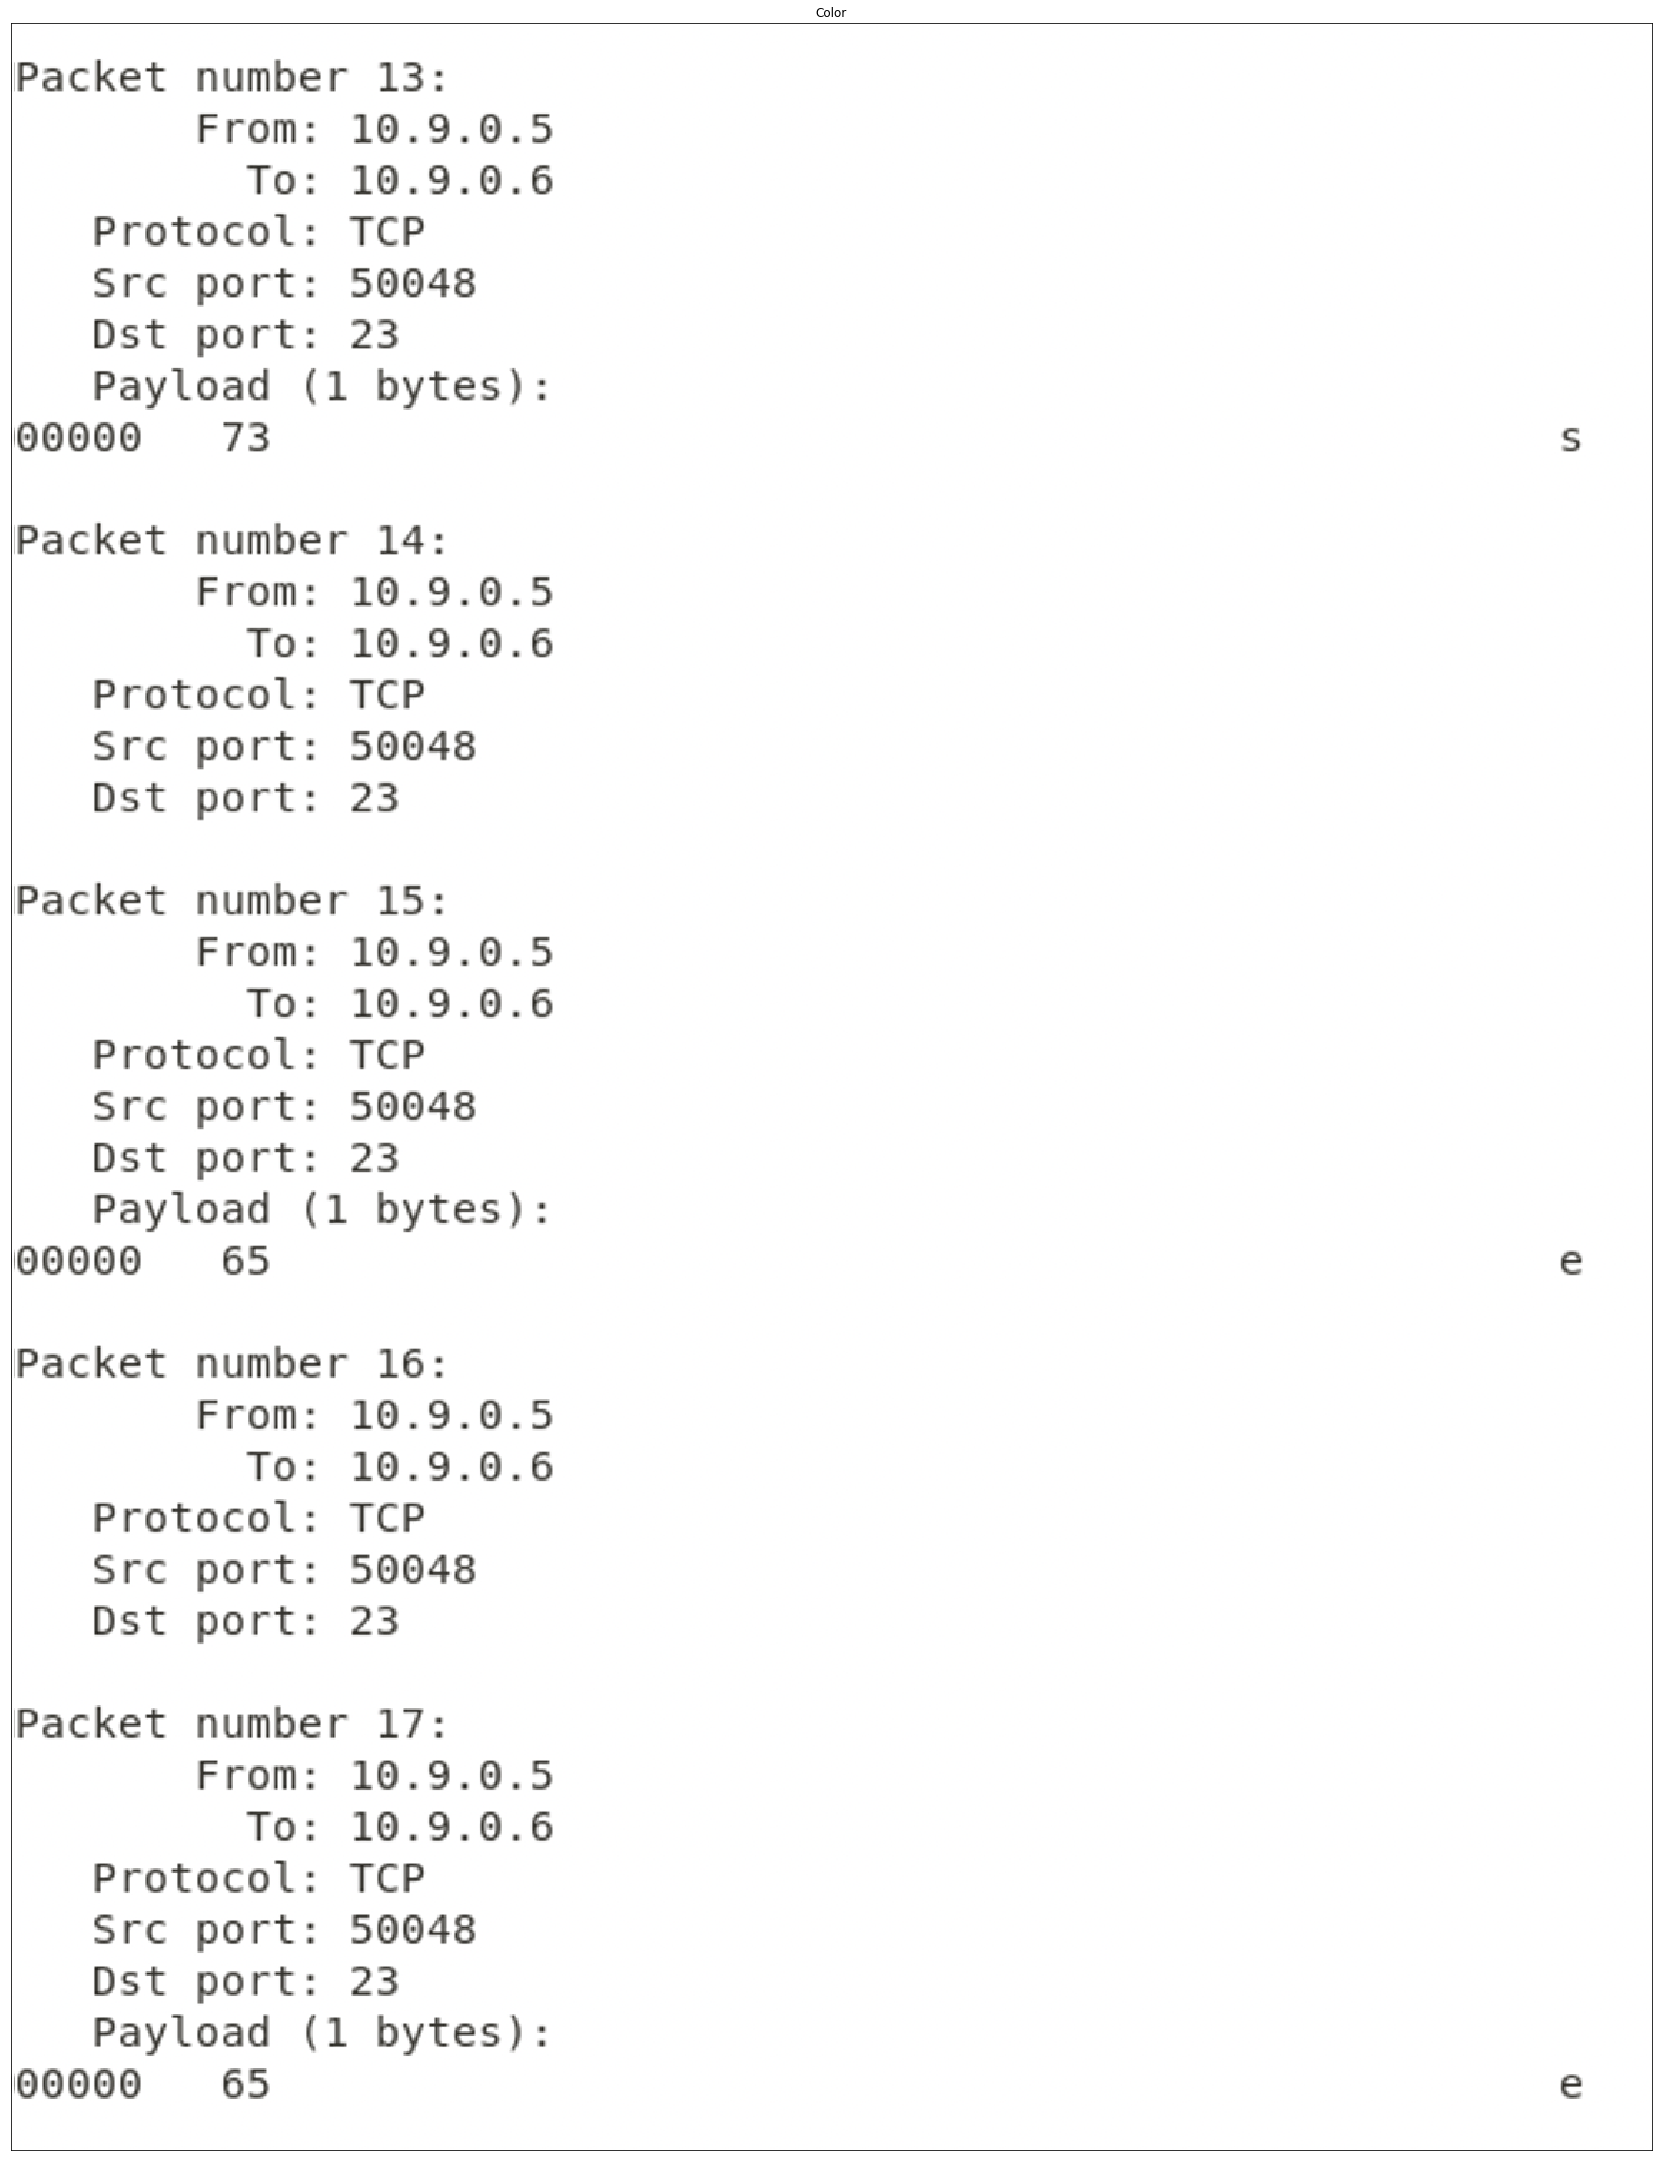

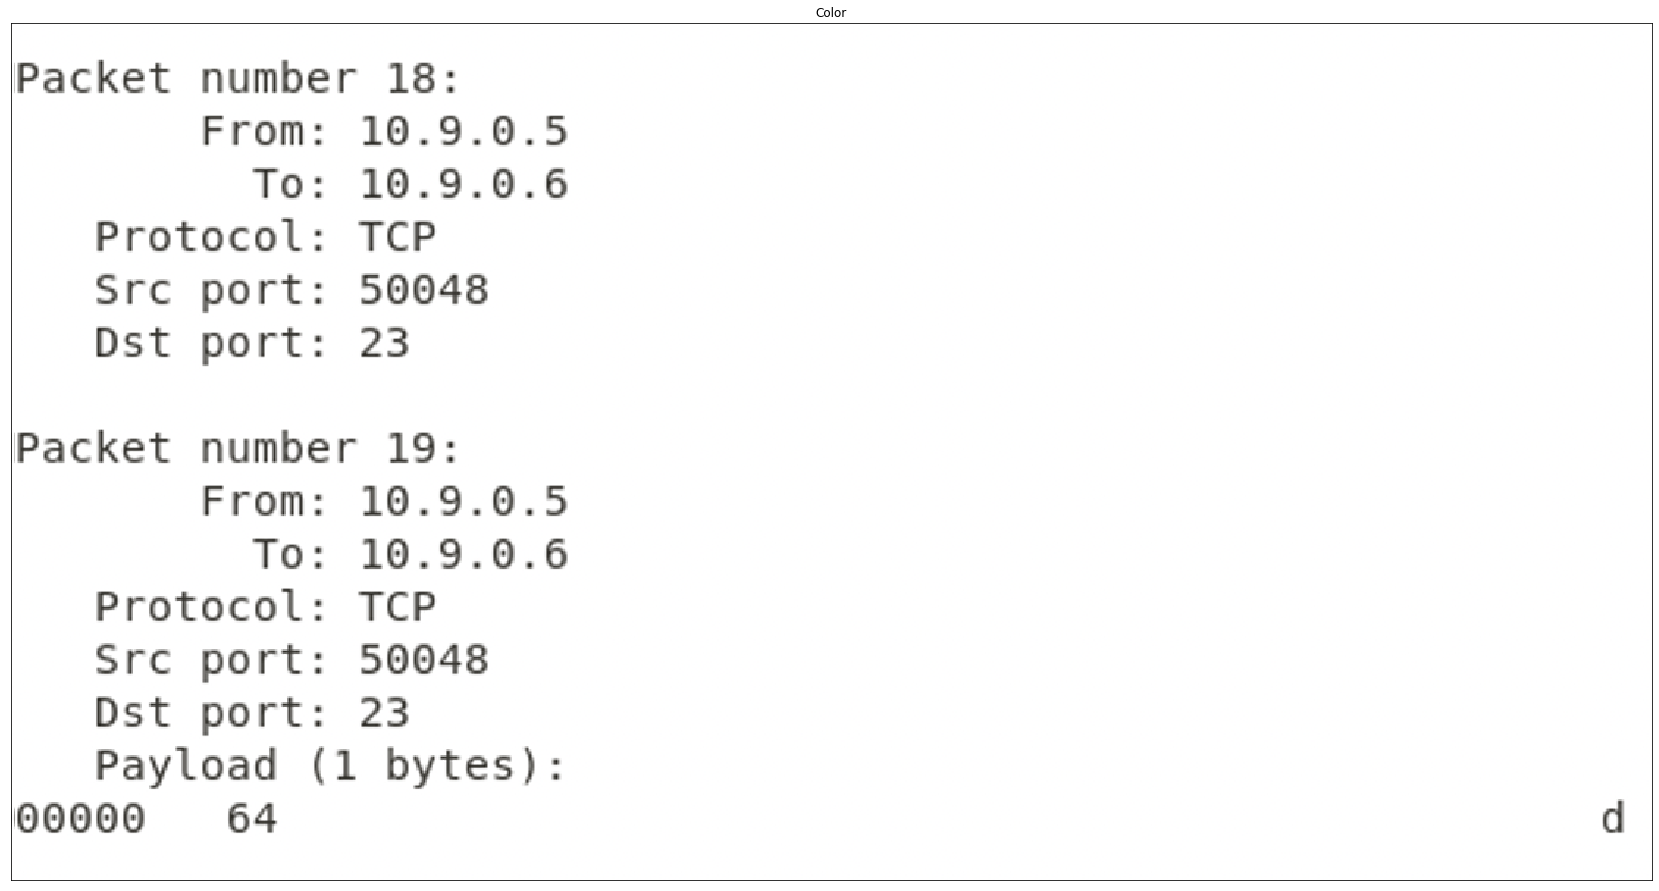

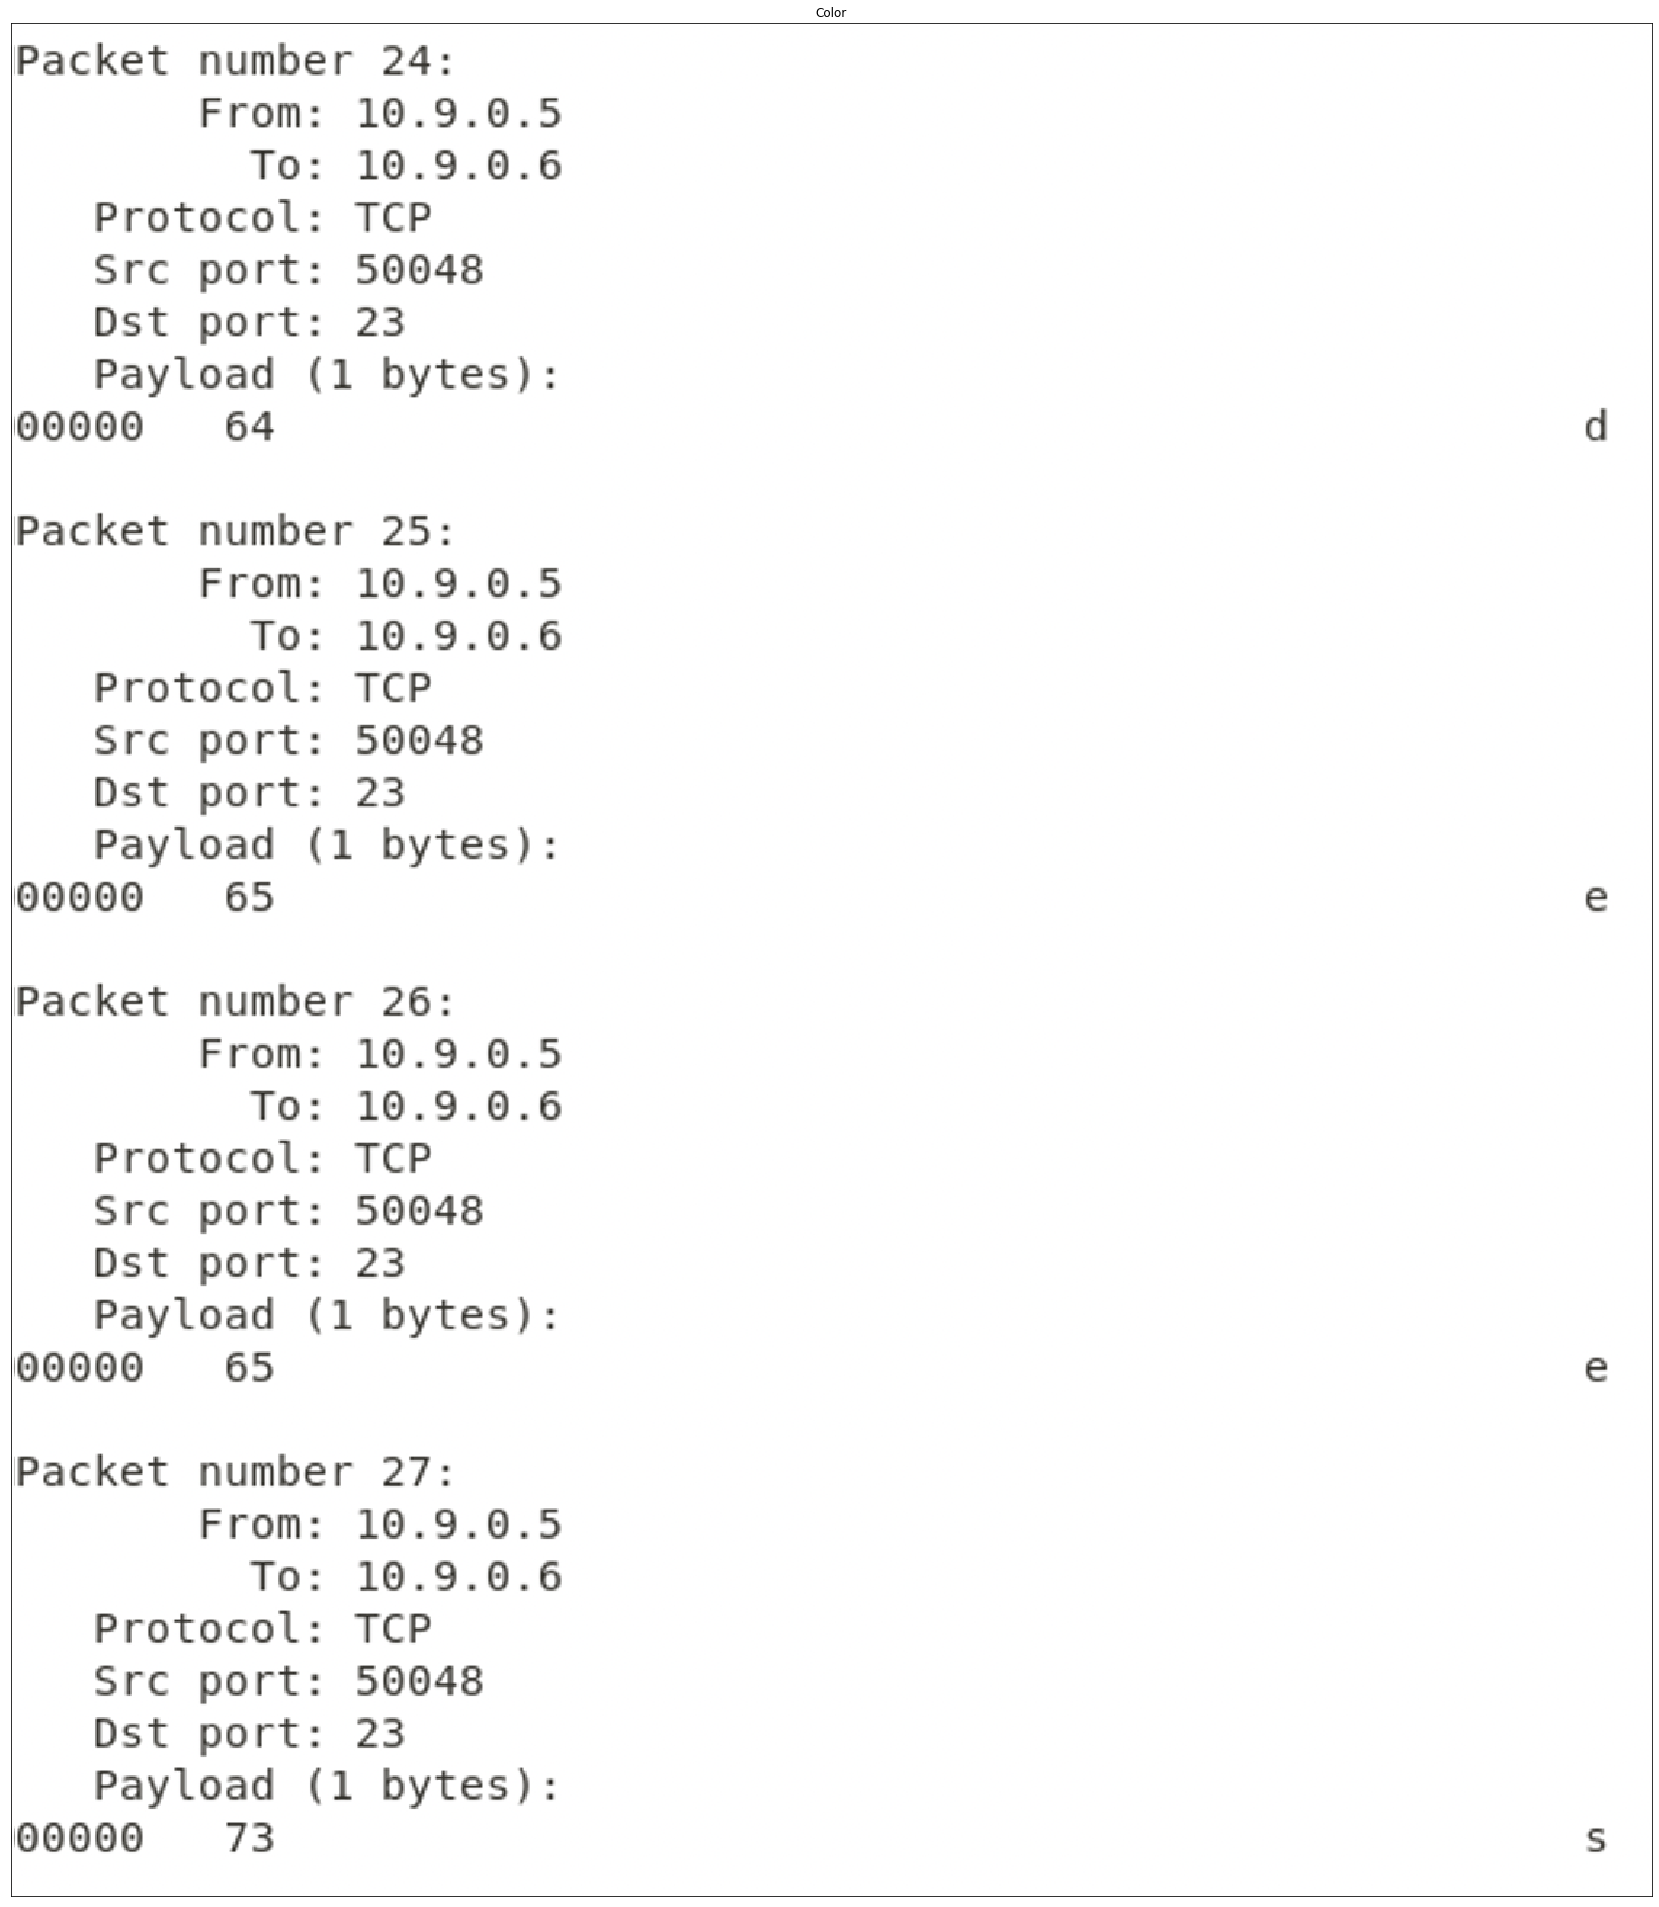

In [30]:
show_img('Task 2.1C/username.png')
show_img('Task 2.1C/username_2.png')
show_img('Task 2.1C/passwd.png')

## Task 2.2: Spoofing
### Task 2.2A:
Write a spoofing program. Please write your own packet spoofing program in C. You need to provide evidences (e.g., Wireshark packet trace) to show that your program successfully sends out spoofed IP packets.


In [31]:
# gcc -o spoofing spoofing.c -lpcap
!cat 'Task 2.2A'/spoofing.c

#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>
#include <string.h>
#include <netdb.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <sys/socket.h>

#include <netinet/in_systm.h>
#include <netinet/in.h>
#include <netinet/ip.h>
#include <netinet/udp.h>
#include <netinet/ip_icmp.h>
#include <netinet/tcp.h>

#include <arpa/inet.h>

/*
 * Referenced from: https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=lawyerle&logNo=70103083901&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView
Internet checksum function (from BSD Tahoe) 
We can use this function to calculate checksums for all layers. 
ICMP protocol mandates checksum, so we have to calculate it.
*/
unsigned short in_cksum(unsigned short *addr, int len)
{
  int nleft = len;
  int sum = 0;
  unsigned short *w = addr;
  unsigned short answer = 0;

  while (nleft > 1) {
    sum += *w++;
    nleft -= 2;
  }

  if (nleft == 1) {
    *(unsigned char *) (&answer) = *(unsigned char *)

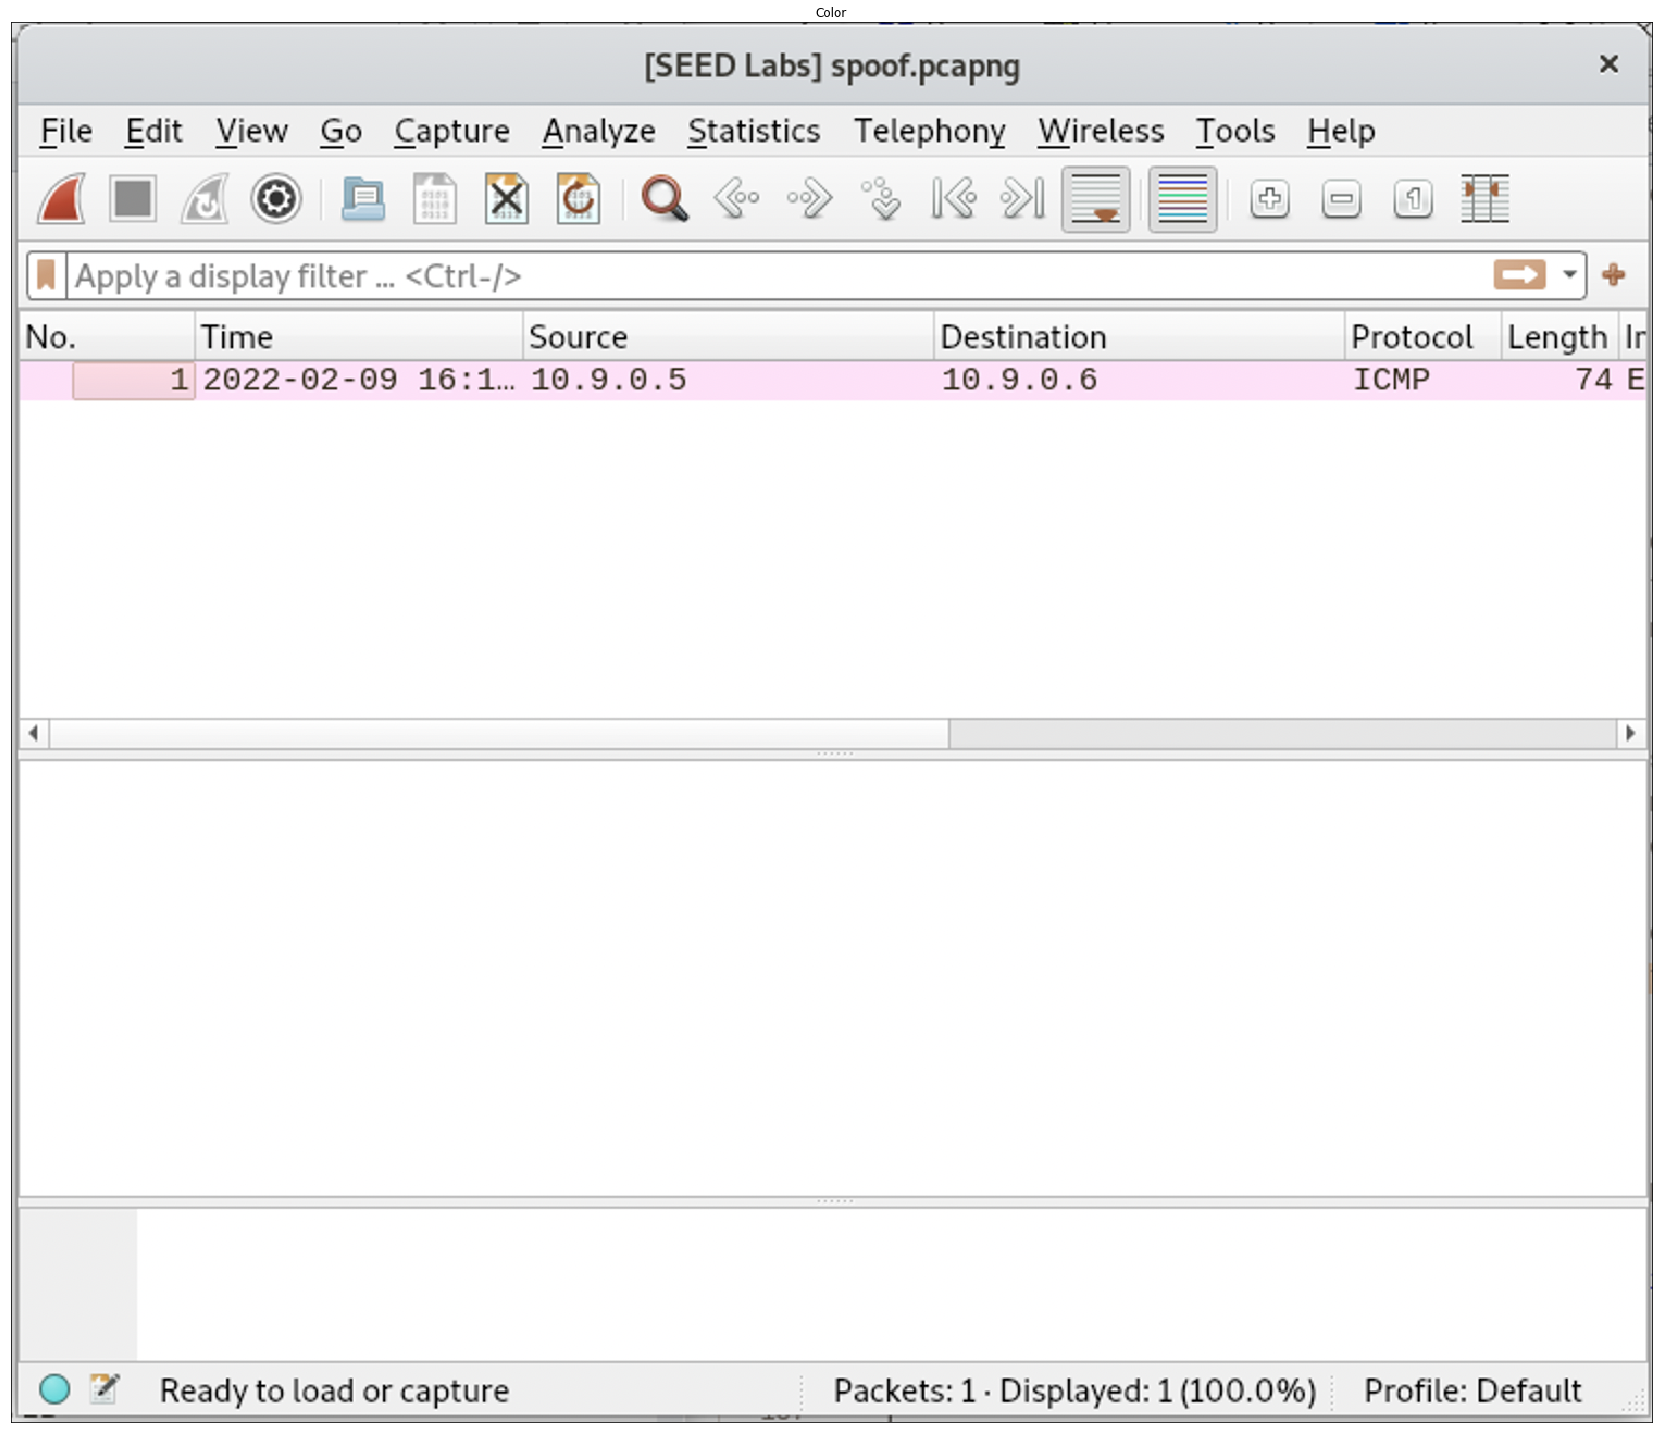

In [32]:
show_img('Task 2.2A/spoof.png')

### Task 2.2B:
Spoof an ICMP Echo Request. Spoof an ICMP echo request packet on behalf of another machine (i.e., using another machine’s IP address as its source IP address). This packet should be sent to a remote machine on the Internet (the machine must be alive). You should turn on your Wireshark, so if your spoofing is successful, you can see the echo reply coming back from the remote machine.

In [33]:
# gcc -o spoof_echo spoof_echo.c -lpcap
!cat 'Task 2.2B'/spoof_echo.c

#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>
#include <string.h>
#include <netdb.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <sys/socket.h>

#include <netinet/in_systm.h>
#include <netinet/in.h>
#include <netinet/ip.h>
#include <netinet/udp.h>
#include <netinet/ip_icmp.h>
#include <netinet/tcp.h>

#include <arpa/inet.h>

/*
 * Referenced from: https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=lawyerle&logNo=70103083901&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView
Internet checksum function (from BSD Tahoe) 
We can use this function to calculate checksums for all layers. 
ICMP protocol mandates checksum, so we have to calculate it.
*/
unsigned short in_cksum(unsigned short *addr, int len)
{
  int nleft = len;
  int sum = 0;
  unsigned short *w = addr;
  unsigned short answer = 0;

  while (nleft > 1) {
    sum += *w++;
    nleft -= 2;
  }

  if (nleft == 1) {
    *(unsigned char *) (&answer) = *(unsigned char *)

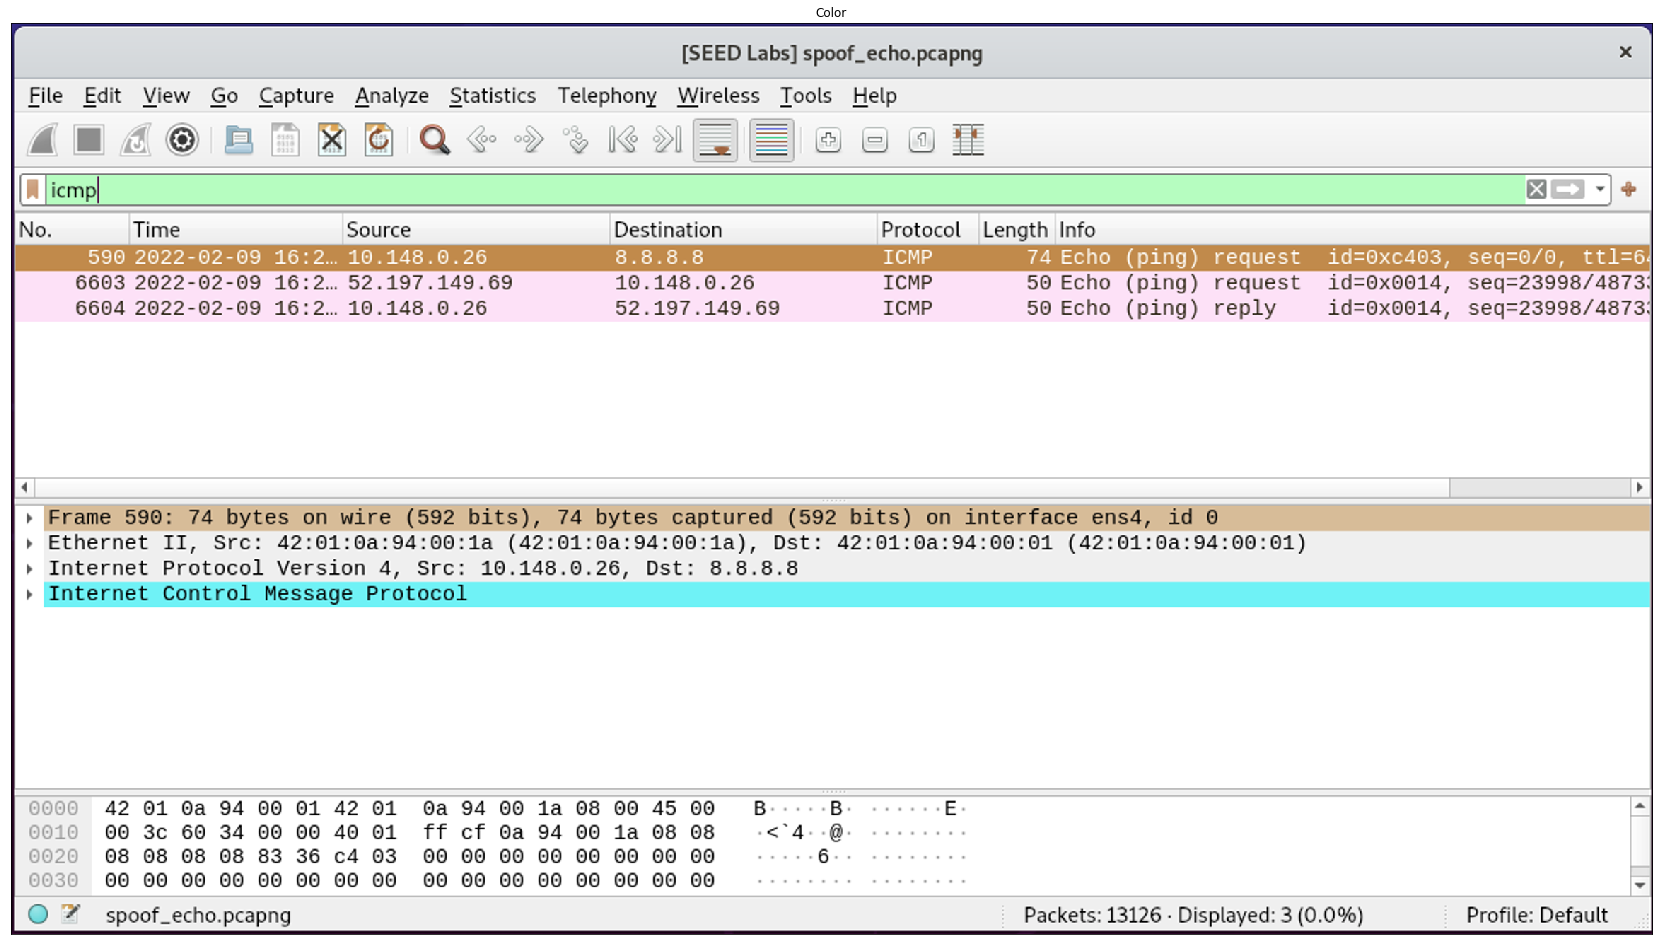

In [38]:
# ./spoof_echo
show_img('Task 2.2B/spoof_echo.png')

* Question 4. Can you set the IP packet length field to an arbitrary value, regardless of how big the actual packet is?

In [34]:
!cat 'Task 2.2B'/q4

No, you can t set an arbitrary value, it must be of size 60.
Total length for our packet require to be converted to the network byte-order(htons(60)


* Question 5. Using the raw socket programming, do you have to calculate the checksum for the IP header?

In [35]:
!cat 'Task 2.2B'/q5

Yes, the checksum is used to ensure that the IP header is not corrupted, and to allow the reliable packet to be passed to the raw socket


* Question 6. Why do you need the root privilege to run the programs that use raw sockets? Where does the program fail if executed without the root privilege?

In [36]:
!cat 'Task 2.2B'/q6

The raw socket allows the programmer to simulate a server on any port and in order for the binding of the port to occur, root privilege is required to bind to dedicated ports (<1024). The program fails at sd = socket(AF_INET, SOCK_RAW, IPPROTO_RAW)) < 0


### Task 2.3: Sniff and then Spoof
In this task, you will combine the sniffing and spoofing techniques to implement the following sniff-and- then-spoof program. You need two VMs on the same LAN. From VM A, you ping an IP X. This will generate an ICMP echo request packet. If X is alive, the ping program will receive an echo reply, and print out the response. Your sniff-and-then-spoof program runs on VM B, which monitors the LAN through packet sniffing. Whenever it sees an ICMP echo request, regardless of what the target IP address is, your program should immediately send out an echo reply using the packet spoofing technique. Therefore, regard- less of whether machine X is alive or not, the ping program will always receive a reply, indicating that X is alive. You need to write such a program in C, and include screenshots in your report to show that your program works. Please also attach the code (with adequate amount of comments) in your report.

In [39]:
# gcc -o sniff_and_spoof sniff_and_spoof.c -lpcap
!cat 'Task 2.3'/sniff_and_spoof.c

/* Packet sniffing and snooping program based on the work of Tcpdump Group  */

#define APP_NAME    "sniffex"
#define APP_DESC		"Sniffer example using libpcap"
#define APP_COPYRIGHT	"Copyright (c) 2006 The Tcpdump Group"
#define APP_DISCLAIMER	"THERE IS ABSOLUTELY NO WARRANTY FOR THIS PROGRAM."

#include <pcap.h>
#include <stdio.h>
#include <string.h>
#include <stdlib.h>
#include <ctype.h>
#include <errno.h>
#include <sys/types.h>
#include <sys/socket.h>
#include <net/ethernet.h>
#include <netinet/in.h>
#include <netinet/ip.h>
#include <netinet/ip_icmp.h>
#include <arpa/inet.h>

/* default snap length (maximum bytes per packet to capture) */
#define SNAP_LEN 1518

/* ethernet headers are always exactly 14 bytes [1] */
#define SIZE_ETHERNET sizeof(struct ethhdr)

/* Spoofed packet containing only IP and ICMP headers */
struct spoofed_packet
{
    struct ip iph;
    struct icmp icmph;
};


void
got_packet(u_char *args, const struct pcap_pkthdr *header, const u_char *packet);

void
print_

In [40]:
# ./sniff_and_spoof
!cat 'Task 2.3'/sniff_and_spoof.txt

[02/09/22]admin@ubuntu-1:~/.../Task 2.3$ ping 8.8.8.8 -c 1
PING 8.8.8.8 (8.8.8.8) 56(84) bytes of data.
64 bytes from 8.8.8.8: icmp_seq=1 ttl=115 time=0.967 ms

--- 8.8.8.8 ping statistics ---
1 packets transmitted, 1 received, 0% packet loss, time 0ms
rtt min/avg/max/mdev = 0.967/0.967/0.967/0.000 ms


root@ubuntu-1:/volumes/Task 2.3# ./sniff_and_spoof ens4
Device: ens4
Number of packets: -1
Filter expression: icmp and icmp[icmptype] == icmp-echo
1) ICMP Sniffing source: from--10.148.0.26
   ICMP Sniffing destination: to--8.8.8.8

Spoofed packet src is 8.8.8.8
Spoofed packet dest is 10.148.0.26

Spoofed Packet sent successfully

